In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

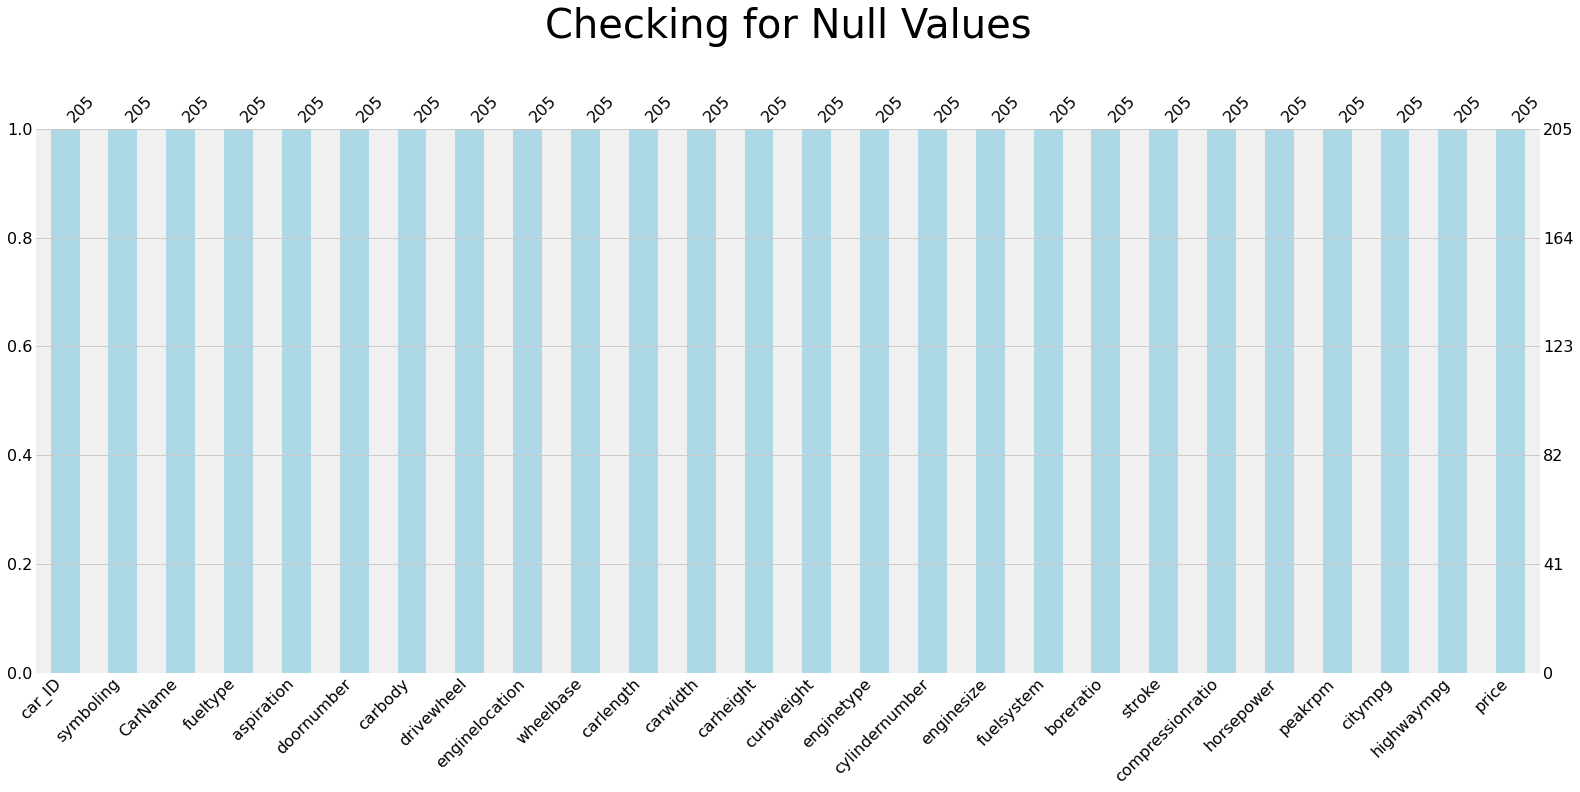

In [7]:
# checking for null values using missingno module

import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

- There are no Null values in the data

In [8]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

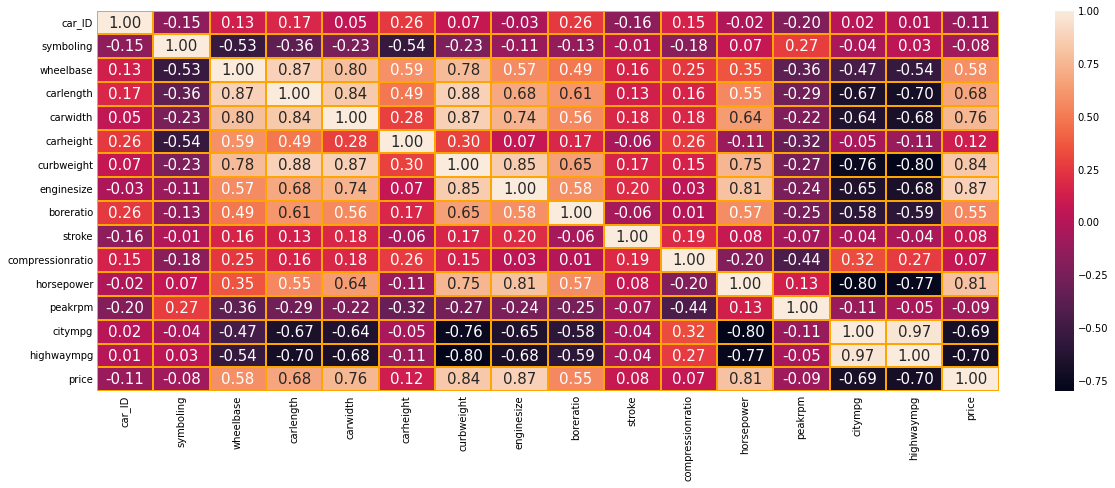

In [9]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

In [10]:
!pip install dython

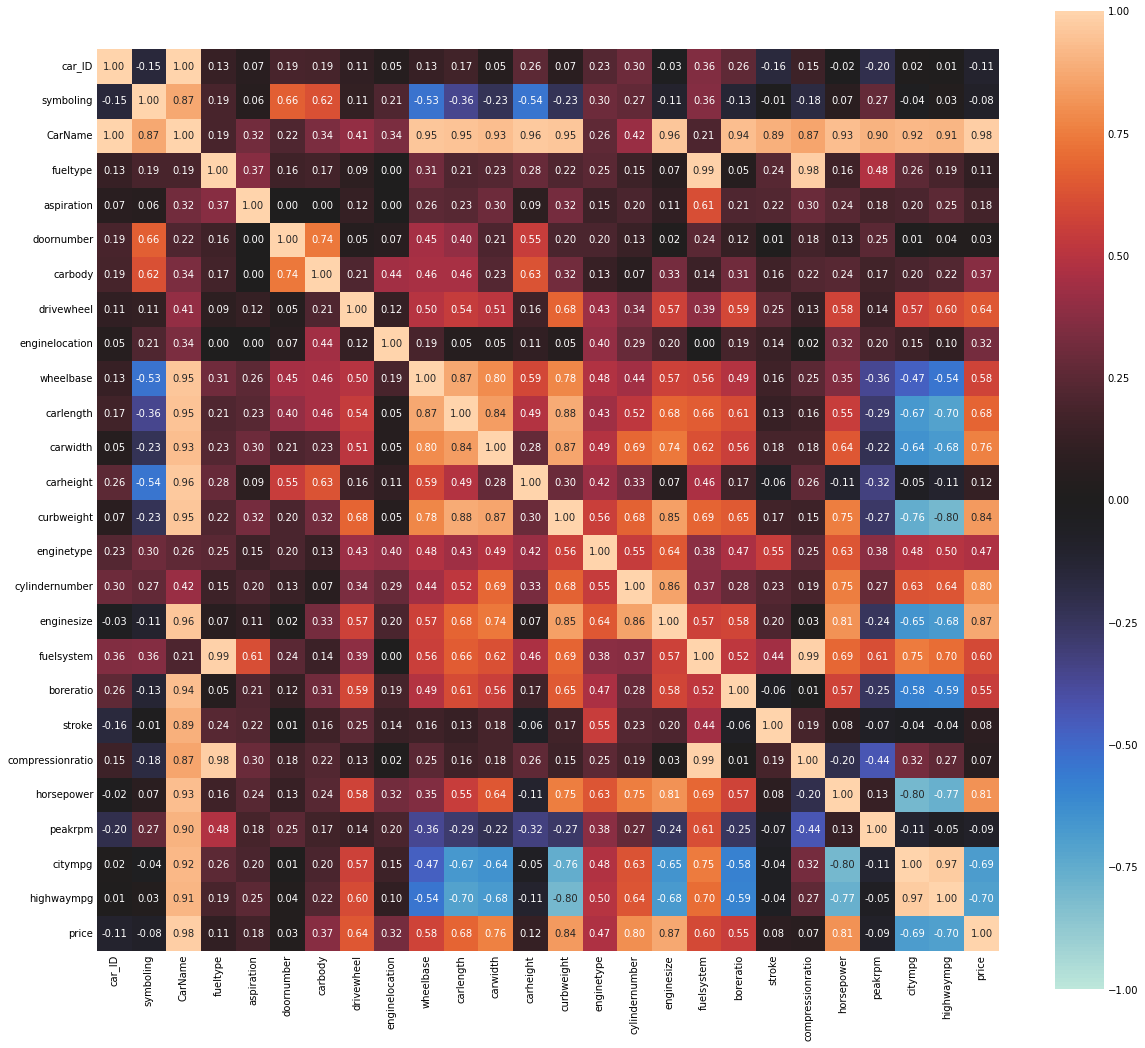

In [11]:
# finding correlation of numerical and categorical features

from dython.nominal import associations

associations(df, figsize = (18, 18))
plt.show()

### correlation of numerical variables
- wheelbase have positive correlation with price of 58%.
- car length and car width have positive correlation with price of 68% and 76%.
- curbweight have positive correlation with price of 84%.
- enginesize have positive correlation with price of 87%.
- boreratio have positive correlation with price of 55%.
- horsepower have positive correlation with price of 81%.
- citympg and highwaympg have negative correlation with price of 69% and 70%.

### correlation of categorical variables
- carname is highly correlated with target and independent features.
- drivewheel have positive correlation with price of 64%.
- enginetype have positive correlation with price of 47%.
- cylindernumber have a significant positive correlation with price of 80%.
- fuelsystem have positive correlation with price of 60%.

#### Possibility of multicollinearity in features

- carname is highly correlated with multiple columns.
- fuel type is highly correlated with fuelsystem and compressionratio.
- carlength and carwidth are highly positive correlated.
- wheelbase is highly positive correlated with carlength, carwidth, and carweight.
- cylinder number is positively correlated with enginesize.
- fuelsystem and compressionratio is very highly positive correlated.
- citympg has highly positive correlation with highwaympg.

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Univariate Analysis

In [13]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [14]:
num_cols.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
cat_cols.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

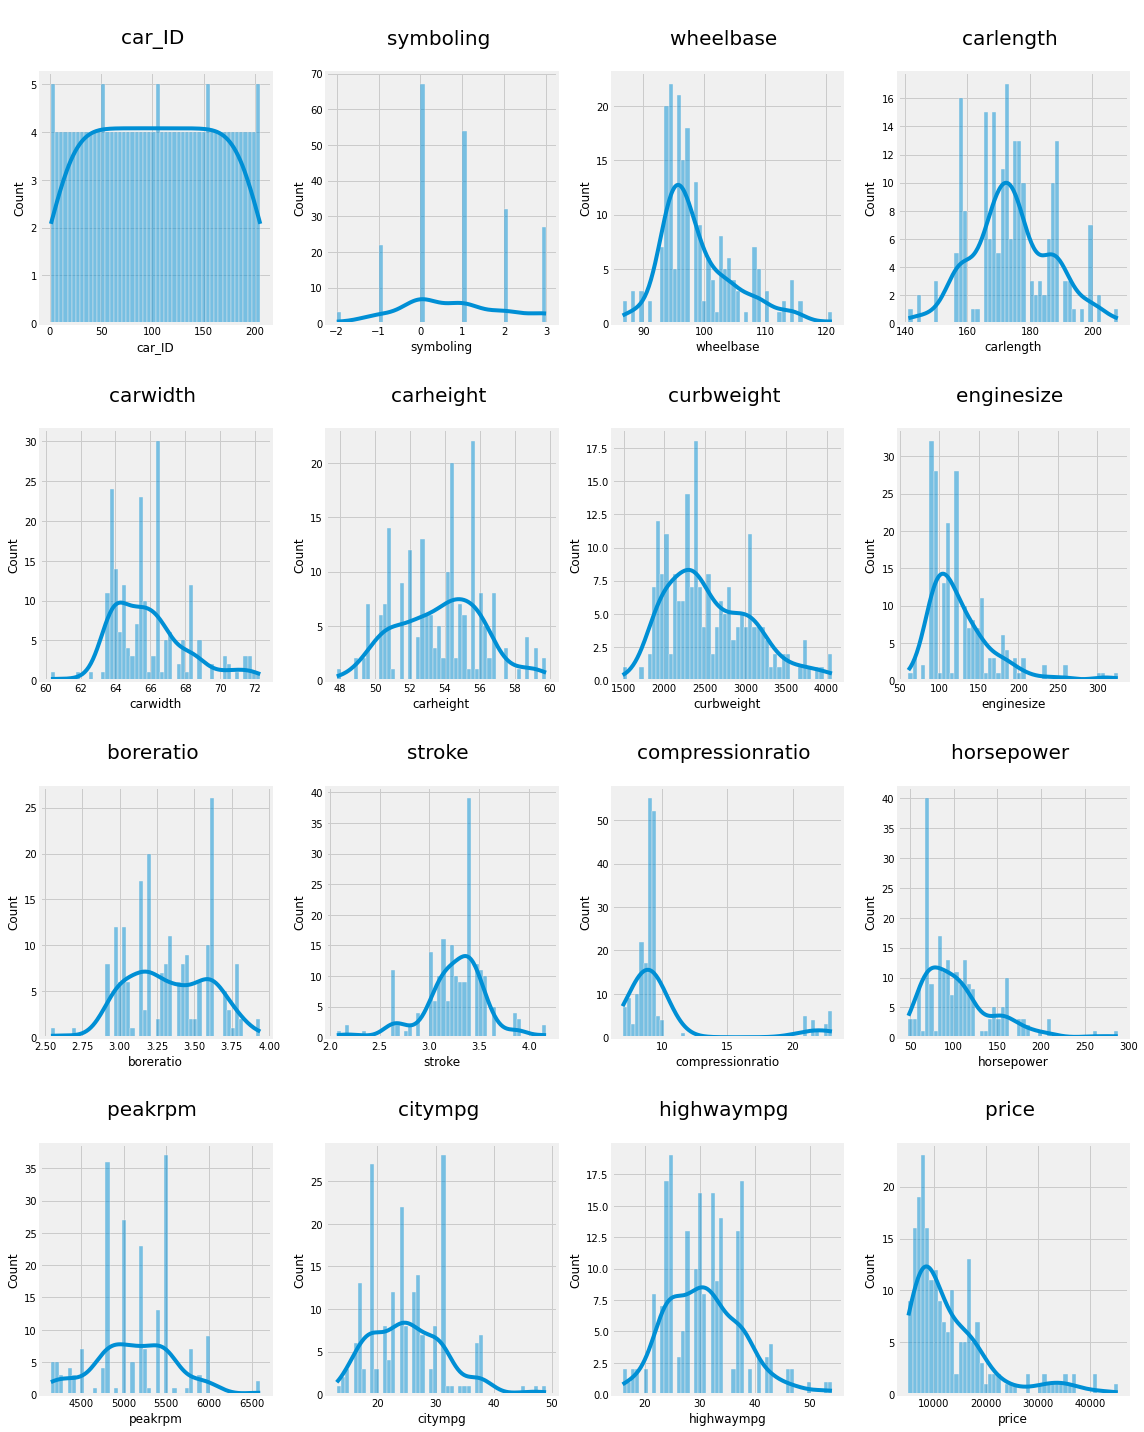

In [16]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

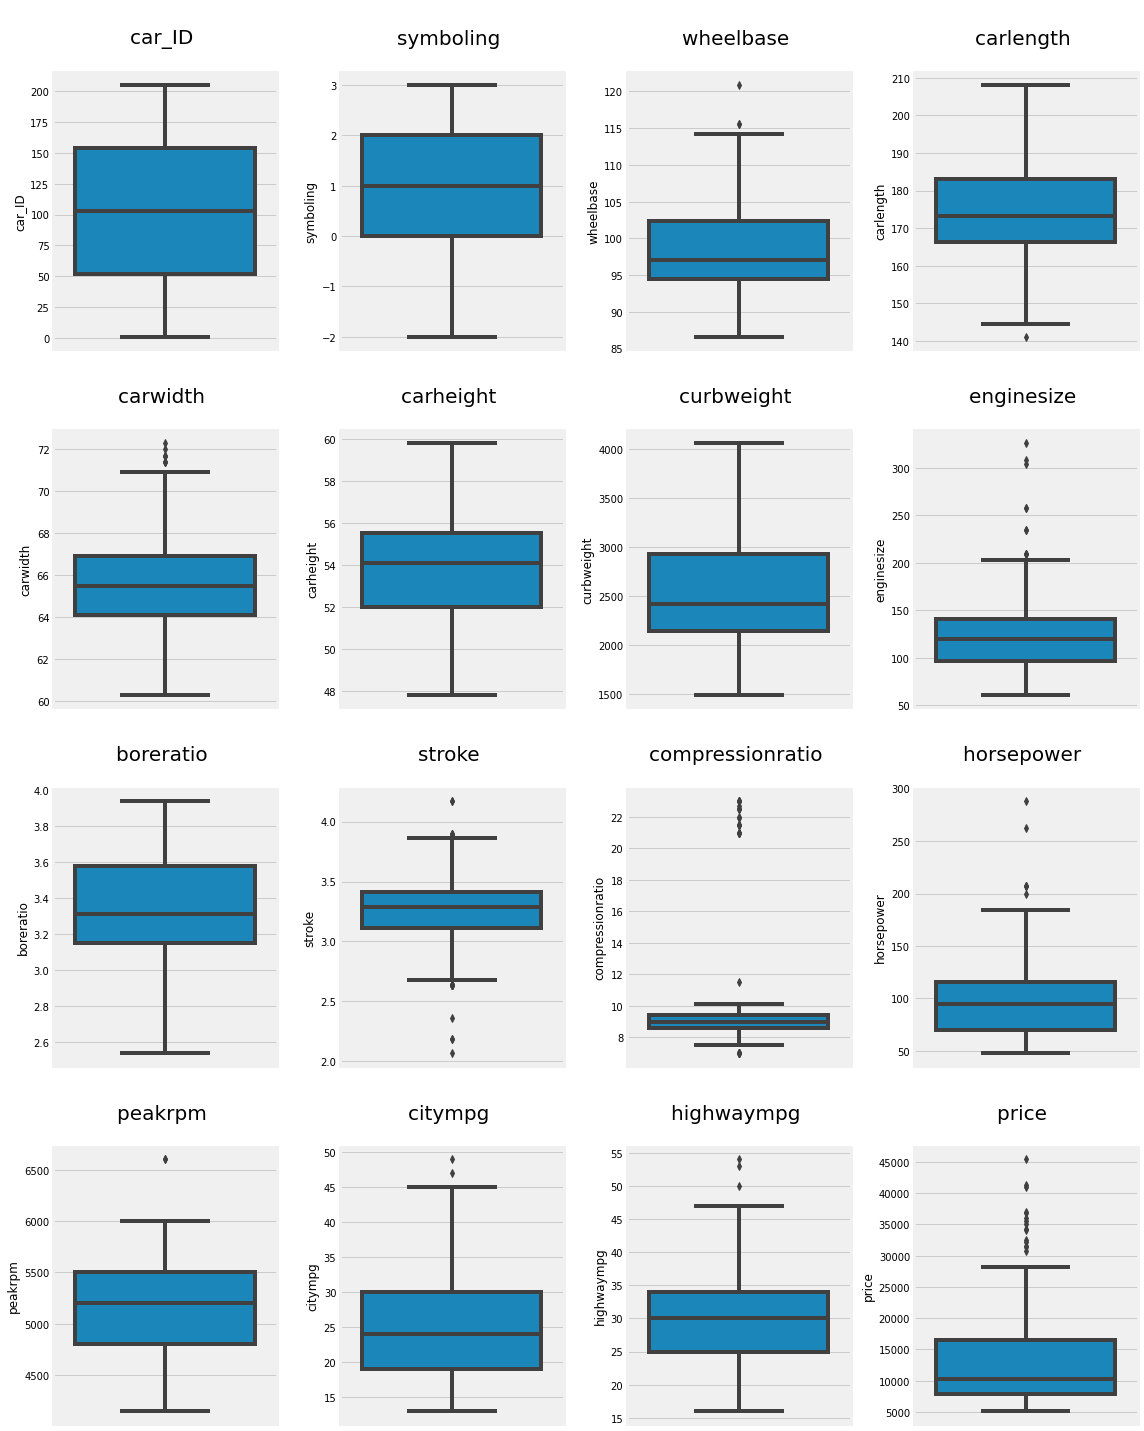

In [17]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

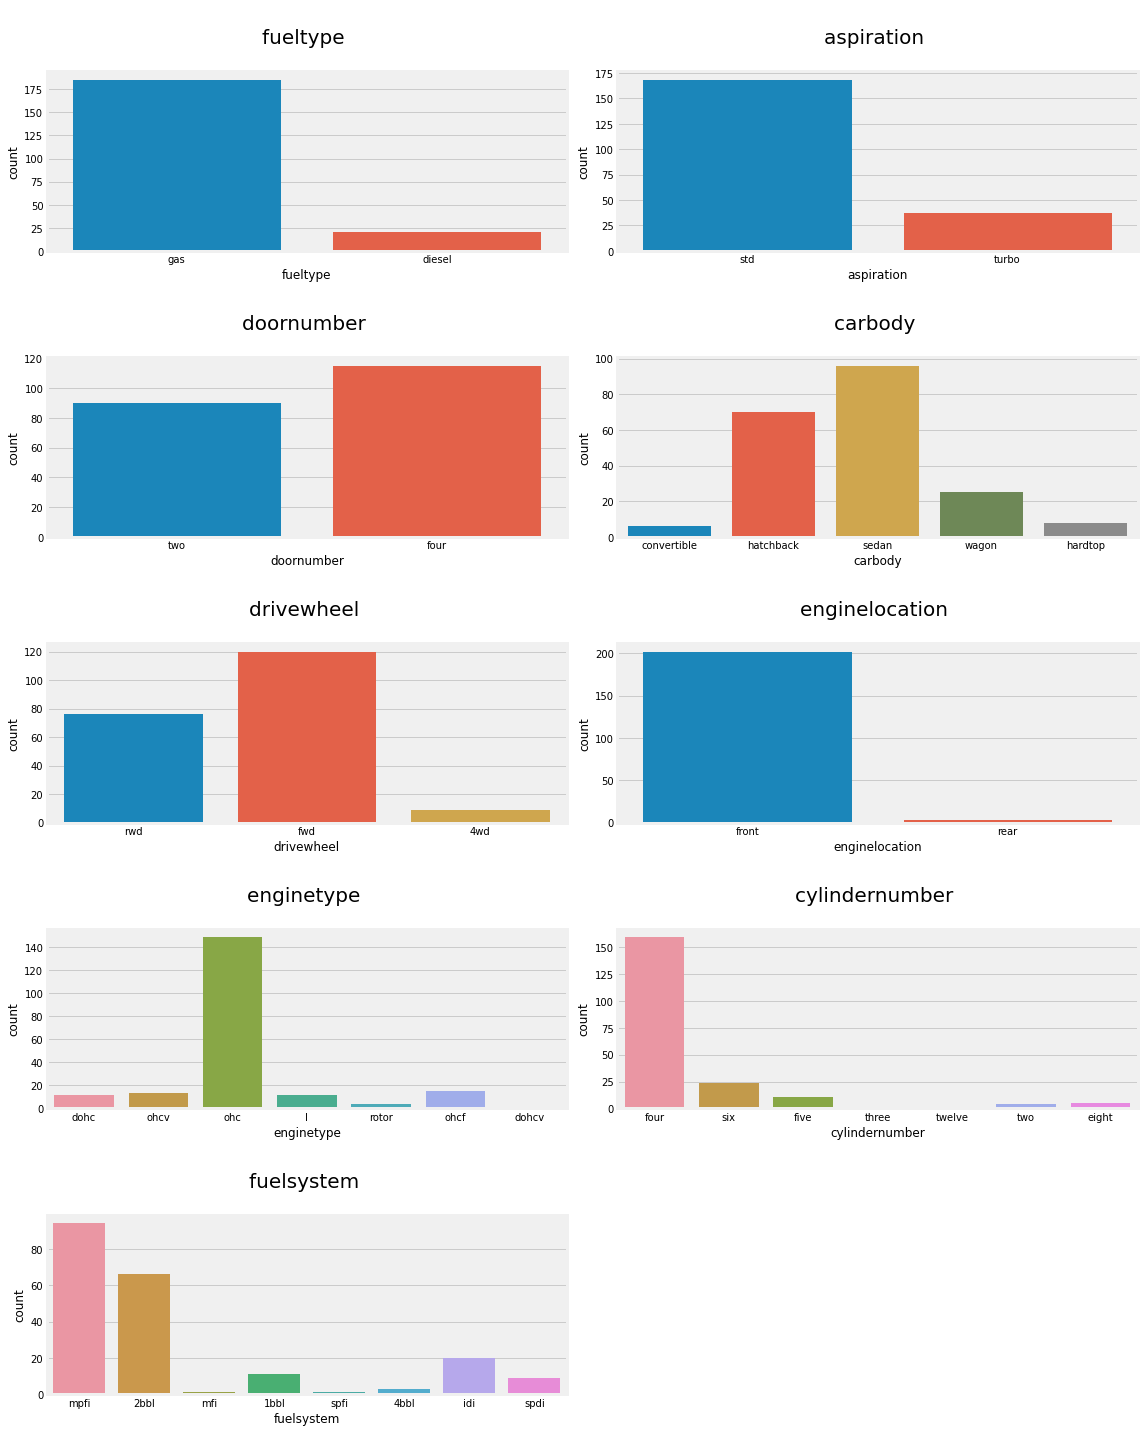

In [18]:
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [19]:
# pie chart of fueltype column

fueltype = df['fueltype'].value_counts().reset_index()
fueltype.columns = ['fueltype', 'value_counts']
fig = px.pie(fueltype, names = 'fueltype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [20]:
# pie chart of aspiration column

aspiration = df['aspiration'].value_counts().reset_index()
aspiration.columns = ['aspiration', 'value_counts']
fig = px.pie(aspiration, names = 'aspiration', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [21]:
# pie chart of doornumber column

doornumber = df['doornumber'].value_counts().reset_index()
doornumber.columns = ['doornumber', 'value_counts']
fig = px.pie(doornumber, names = 'doornumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [22]:
# pie chart of carbody column

carbody = df['carbody'].value_counts().reset_index()
carbody.columns = ['carbody', 'value_counts']
fig = px.pie(carbody, names = 'carbody', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [23]:
# pie chart of drivewheel column

drivewheel = df['drivewheel'].value_counts().reset_index()
drivewheel.columns = ['drivewheel', 'value_counts']
fig = px.pie(drivewheel, names = 'drivewheel', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [24]:
# pie chart of enginelocation column

enginelocation = df['enginelocation'].value_counts().reset_index()
enginelocation.columns = ['enginelocation', 'value_counts']
fig = px.pie(enginelocation, names = 'enginelocation', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [25]:
# pie chart of enginetype column

enginetype = df['enginetype'].value_counts().reset_index()
enginetype.columns = ['enginetype', 'value_counts']
fig = px.pie(enginetype, names = 'enginetype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [26]:
# pie chart of cylindernumber column

cylindernumber = df['cylindernumber'].value_counts().reset_index()
cylindernumber.columns = ['cylindernumber', 'value_counts']
fig = px.pie(cylindernumber, names = 'cylindernumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

In [27]:
# pie chart of fuelsystem column

fuelsystem = df['fuelsystem'].value_counts().reset_index()
fuelsystem.columns = ['fuelsystem', 'value_counts']
fig = px.pie(fuelsystem, names = 'fuelsystem', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

## Bivariate and Multivariate Analysis

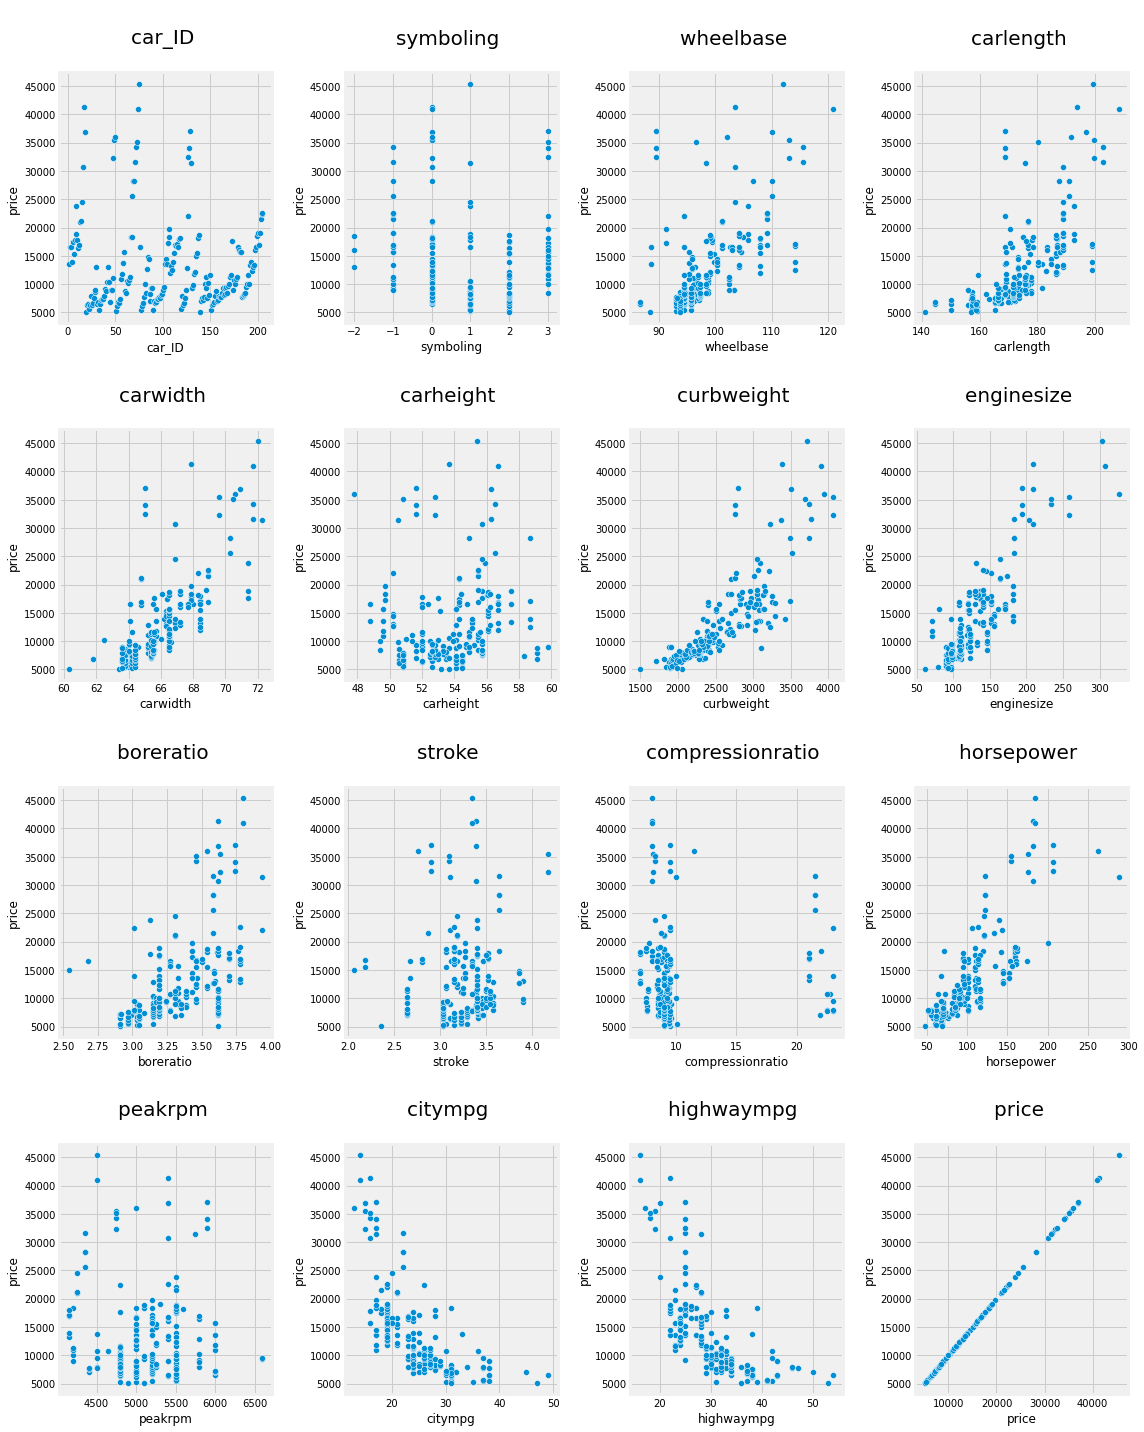

In [28]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

- if wheelbase of car is increasing than the price is also increasing.
- price is increasing with car lengrth and car width.
- heavy cars has higher price.
- cars having powerful engine are having high prices.
- cars with lower mpg are costly.

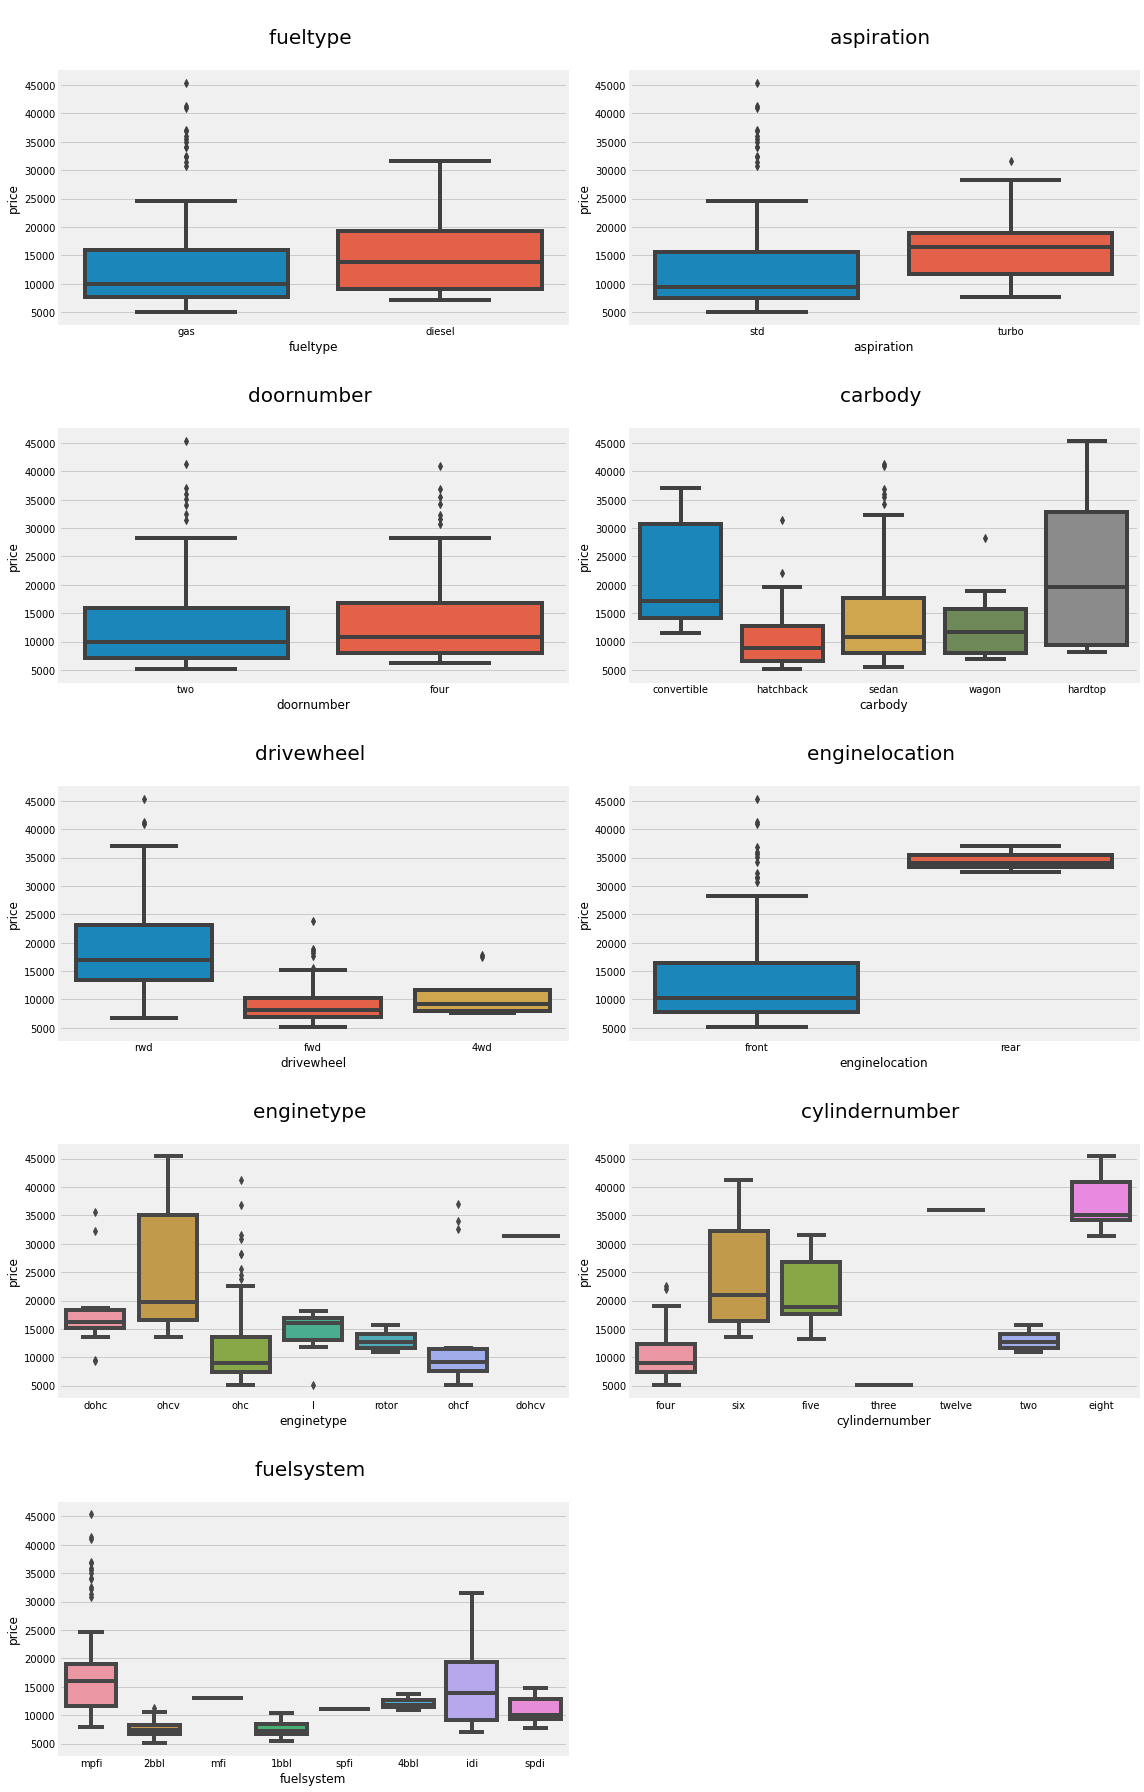

In [29]:
cols = cat_cols.columns

plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cols[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

- convertible, sedan and hardtop cars are costliers than others.
- hardtop cars are very less manufactured but their price is also higher.
- very few cars have engine at rear but if they have their price is higher.
- ohc is the most type of engine used in cars and ohcv is used only in costly cars.
- mostly cars have 4 no of cylinders.
- if a car have higher no of cylinders then its price is also higher.
- mpfi and 2bbl are the most commonly fuel system used in cars.
- idi and spdi type of fuel system is used only in costly cars.

In [30]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [32]:
# extracting companies names 

df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]

In [33]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [34]:
# handling duplicate values 

df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})

In [35]:
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

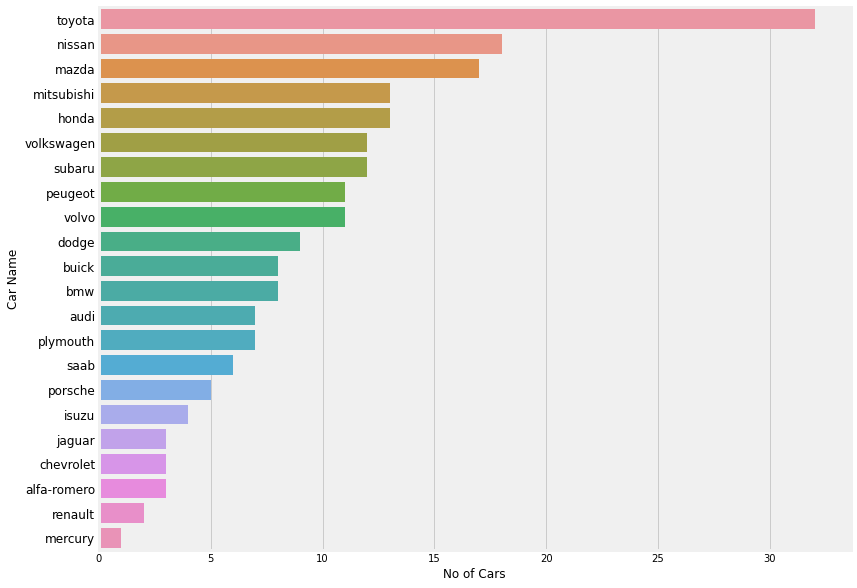

In [36]:
df1 = pd.DataFrame(df['CarName'].value_counts().reset_index())
df1.columns = ['Car Name', 'No of Cars']

plt.figure(figsize = (12, 10))
sns.barplot(x = 'No of Cars', y = 'Car Name', data = df1)
plt.yticks(size = 12)
plt.show()

- toyota cars are most used.
- mercury is the less used car.

In [37]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'doornumber')

- cars having four doors are longer than cars having two doors but cars of two doors are costly than cars of four doors.

In [38]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'carbody')

In [39]:
px.scatter(data_frame = df, x = 'carwidth', y = 'price', color = 'carbody')

In [40]:
px.scatter(data_frame = df, x = 'enginesize', y = 'price', color = 'carbody')

In [41]:
px.scatter(data_frame = df, x = 'horsepower', y = 'price', color = 'carbody')

- we have seen that convertible, sedan and hardtop are costlier and we can also see that these cars are longer than others, their engine size is also big and their jorse power is also higher. so these might be the reasons for their higher cost.

In [42]:
px.scatter(data_frame = df, x = 'enginesize', y = 'price', color = 'enginetype')

- ohc is smaller engine thus its price is also lower.
- ohcv is larger engine thus its price is also higher.

In [43]:
px.scatter(data_frame = df, x = 'horsepower', y = 'price', color = 'enginetype')

- horse power of ohc engine type is lower thus its price is also lower.
- horse power of ohcv engine type is higher thus its price is also higher. 

In [44]:
px.scatter(data_frame = df, x = 'citympg', y = 'price', color = 'enginetype')

In [45]:
px.scatter(data_frame = df, x = 'highwaympg', y = 'price', color = 'enginetype')

- ohcv engine type is larger in size and have high horsepower than ohc but mpg of ohc is lower than ohcv and this might be the reason why ohc is used in most of the cars.

In [46]:
px.scatter(data_frame = df, x = 'citympg', y = 'price', color = 'fuelsystem')

In [47]:
px.scatter(data_frame = df, x = 'highwaympg', y = 'price', color = 'fuelsystem')

- mpfi and 2bbl were mostly used fuel types and we can see that these fuel types have high mpg.

## Data Preprocessing

In [48]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
df.drop(columns = ['car_ID'], axis = 1, inplace = True)

In [50]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [52]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

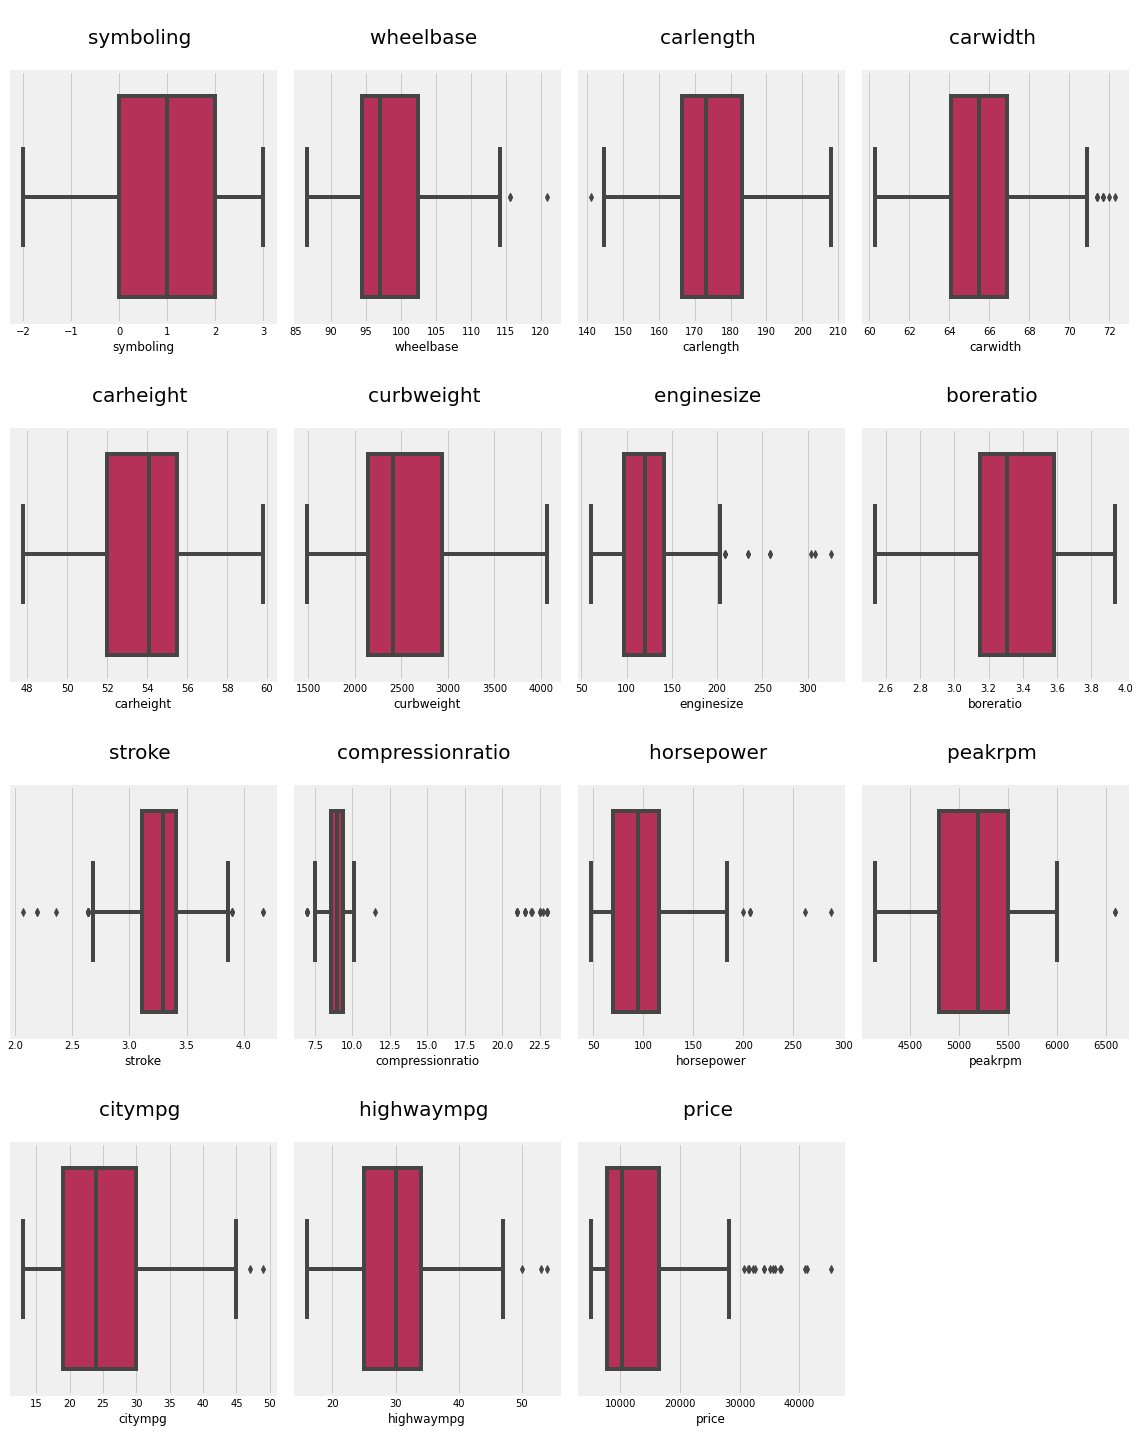

In [53]:
# checking for outliers

cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [54]:
# encoding ordinal categorical columns

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [55]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
# creating features and label variable

X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [57]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [58]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,6.266245e+00,symboling
1,3.728616e+00,doornumber
2,1.883517e+01,wheelbase
3,2.269642e+01,carlength
4,1.465185e+01,carwidth
5,7.304687e+00,carheight
6,4.083151e+01,curbweight
7,2.874438e+01,cylindernumber
8,6.357978e+01,enginesize
9,1.008866e+01,boreratio


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [60]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
lr.score(X_train, y_train)

0.9743361899011469

In [63]:
lr.score(X_test, y_test)

0.8964031255802524

## Lasso Regression

In [64]:
from sklearn.linear_model import Lasso, LassoCV

In [65]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [66]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.0036784155250709)

In [67]:
lasso.score(X_train, y_train)

0.9742944730999923

In [68]:
lasso.score(X_test, y_test)

0.8607105007158444

## Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
dtr.score(X_train, y_train)

0.9985246605173365

In [71]:
dtr.score(X_test, y_test)

0.8622741502838325

## Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
rfr.score(X_train, y_train)

0.9893254638746536

In [74]:
rfr.score(X_test, y_test)

0.9140947909857652

## Ada Boost

In [75]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [76]:
ada.score(X_train, y_train)

0.9970186327145896

In [77]:
ada.score(X_test, y_test)

0.8803497031387406

## Gradient Boost Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [79]:
gbr.score(X_train, y_train)

0.9936871712309413

In [80]:
gbr.score(X_test, y_test)

0.8977157453133735

## XgBoost

In [81]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [82]:
xgb.score(X_train, y_train)

0.9985235166284753

In [83]:
xgb.score(X_test, y_test)

0.9044995417046205

## Voting Regressor

In [84]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=1.0036784155250709)),
                            ('Decision Tree', DecisionTreeRegressor()),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor())),
                            ('Gradient Boost', GradientBoostingRegressor()),
                            ('XgBoost',
                             XGBRegressor(base_sc...
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=7, max_leaves=0,
              

In [85]:
vr.score(X_train, y_train)

0.9967795061939161

In [86]:
vr.score(X_test, y_test)

0.9097815396058697

In [87]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), vr.score(X_test, y_test)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.914095
7,Voting Regressor,0.909782
6,XgBoost,0.904500
5,Gradient Boost,0.897716
0,Linear Regression,0.896403
4,Ada Boost,0.880350
2,Decision Tree,0.862274
1,Lasso Regression,0.860711


In [88]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

[Voting] ........ (1 of 7) Processing Linear Regression, total=   0.0s
[Voting] ................ (5 of 7) Processing Ada Boost, total=   0.2s
[Voting] ......... (2 of 7) Processing Lasso Regression, total=   0.0s
[Voting] ........... (6 of 7) Processing Gradient Boost, total=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+06, tolerance: 8.925e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[Voting] ............ (4 of 7) Processing Random Forest, total=   0.3s
[Voting] ............ (3 of 7) Processing Decision Tree, total=   0.0s
[Voting] .................. (7 of 7) Processing XgBoost, total=   0.9s


### Achieved an accuracty of 91%, next I will try to do some feature selection.

#### Please do upvote if you liked this notebook